In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: >

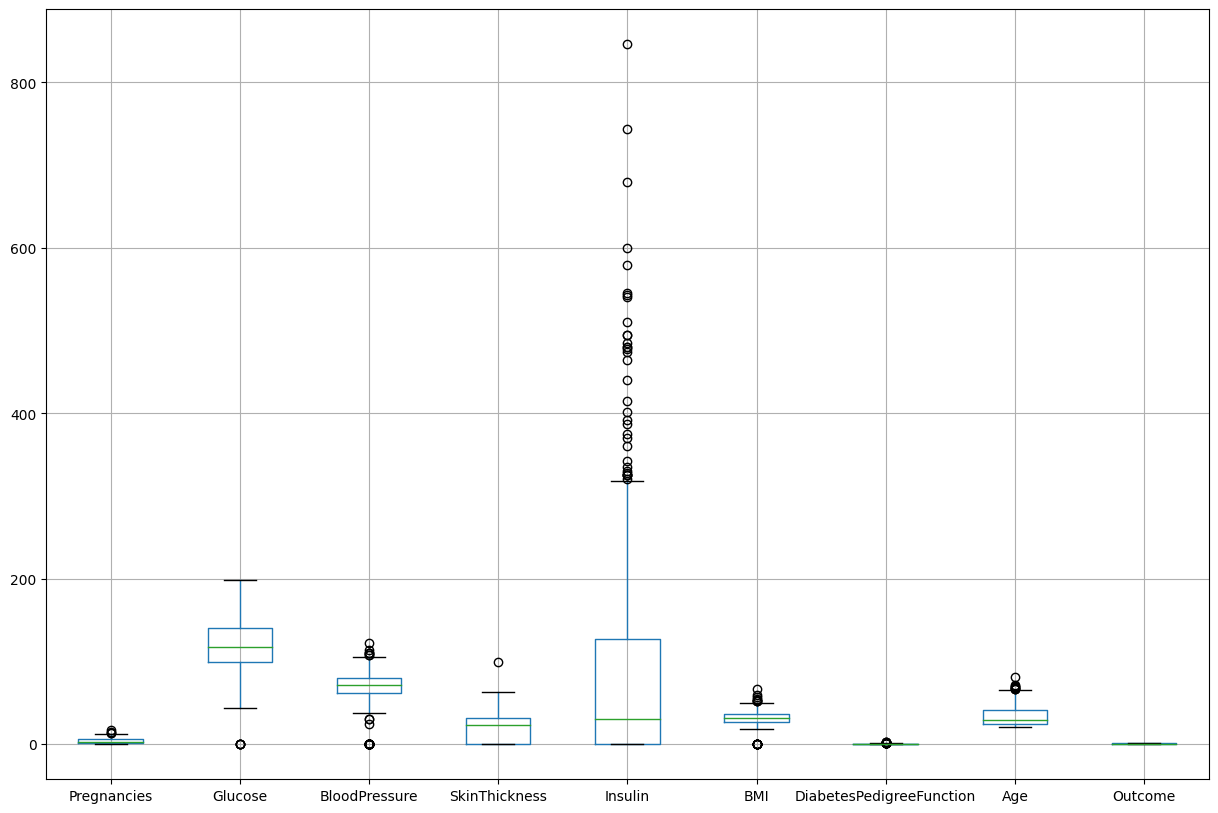

In [ ]:
plt.figure(figsize = (15,10))
df.boxplot()

In [ ]:
#Separating data and the labels
X = df.drop(["Outcome"], axis = 1)
Y = df["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2, stratify = Y)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
svc = SVC(kernel = "linear", gamma = 1)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth = 3)
lrc = LogisticRegression(solver = "liblinear", penalty = "l1")
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
ab = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gb = GradientBoostingClassifier(n_estimators = 2, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)
nb = GaussianNB()

In [ ]:
clfa = {
    "SVC" :svc,
    "KN" : knc,
    "DT" : dtc,
    "LR" : lrc,
    "RF" : rfc,
    "AB" : ab,
    "BC" : bc,
    "ETC" : etc,
    "GB" : gb,
    "XGB" : xgb,
    "NB" :nb,


}

In [ ]:
def train_classifier(clf, X_train, Y_train, X_test, Y_test):
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(Y_test, y_pred)
  precision = precision_score(Y_test, y_pred)
  recall = recall_score(Y_test, y_pred)
  f1 = f1_score(Y_test, y_pred)
  return accuracy, precision, recall, f1

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores =[]
for name, clf in clfa.items():
  current_accuracy, current_precision, current_recall, current_f1 = train_classifier(clf, X_train, Y_train, X_test, Y_test)
  print("For ", name)
  print("Accuracy", current_accuracy)
  print("Precision", current_precision)
  print("Recall", current_recall)
  print("f1_score", current_f1)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  recall_scores.append(current_recall)
  f1_scores.append(current_f1)

For  SVC
Accuracy 0.7727272727272727
Precision 0.7567567567567568
Recall 0.5185185185185185
f1_score 0.6153846153846154
For  KN
Accuracy 0.7272727272727273
Precision 0.6666666666666666
Recall 0.4444444444444444
f1_score 0.5333333333333333
For  DT
Accuracy 0.7402597402597403
Precision 0.6944444444444444
Recall 0.46296296296296297
f1_score 0.5555555555555555
For  LR
Accuracy 0.7532467532467533
Precision 0.7105263157894737
Recall 0.5
f1_score 0.5869565217391304
For  RF
Accuracy 0.7402597402597403
Precision 0.6842105263157895
Recall 0.48148148148148145
f1_score 0.5652173913043478
For  AB
Accuracy 0.7142857142857143
Precision 0.6190476190476191
Recall 0.48148148148148145
f1_score 0.5416666666666666
For  BC
Accuracy 0.7142857142857143
Precision 0.6190476190476191
Recall 0.48148148148148145
f1_score 0.5416666666666666
For  ETC
Accuracy 0.7402597402597403
Precision 0.7058823529411765
Recall 0.4444444444444444
f1_score 0.5454545454545455
For  GB
Accuracy 0.6493506493506493
Precision 0.0
Recall 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df_final = pd.DataFrame({"Algorithm":clfa.keys(), "Accuarcy":accuracy_scores, "Precision":precision_scores, "Recall":recall_scores, "f1_score":f1_scores}).sort_values("Precision", ascending = False)

In [ ]:
df_final

,Algorithm,Accuarcy,Precision,Recall,f1_score
0,SVC,0.772727,0.756757,0.518519,0.615385
10,NB,0.772727,0.720930,0.574074,0.639175
3,LR,0.753247,0.710526,0.500000,0.586957
7,ETC,0.740260,0.705882,0.444444,0.545455
2,DT,0.740260,0.694444,0.462963,0.555556
4,RF,0.740260,0.684211,0.481481,0.565217
1,KN,0.727273,0.666667,0.444444,0.533333
9,XGB,0.740260,0.652174,0.555556,0.600000
5,AB,0.714286,0.619048,0.481481,0.541667
6,BC,0.714286,0.619048,0.481481,0.541667


In [ ]:
#Best model is SVC

In [ ]:
svc.fit(X_train, Y_train)

SVC(gamma=1, kernel='linear')

In [ ]:
# accuracy score on the training data
X_train_prediction = svc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [ ]:
# accuracy score on the test data
X_test_prediction = svc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svc.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (1,85,66,29,0,33.6,0.627,31)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svc.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename = 'diabetes_model.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.pkl', 'rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
